In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [211]:
data = pd.read_csv('data/paride_300.txt')
data.head()

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.075742,0.074842,0.073942,0.073041,0.076751,0.075851,0.074951,0.074051,0.078769,0.077869,...,-0.125498,-0.132645,-0.150835,-0.153636,-0.153611,-0.156466,-0.146616,-0.140954,-0.149332,-0.143556
2,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,...,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000,-5.482000
3,0.110586,0.114610,0.118633,0.122657,0.112162,0.116186,0.120209,0.124233,0.115314,0.119337,...,-0.093954,-0.086574,-0.037130,-0.037800,-0.022391,-0.022791,-0.051437,-0.065312,-0.052372,-0.066505
4,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,...,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500


In [212]:
def find_closest_to_zero_index(column, val = 0):
    absolute_difference = np.abs(column - val)
    closest_index = absolute_difference.idxmin()
    return closest_index

In [213]:
times = data.iloc[::4, 1]
times

0       0.0000
4       0.0005
8       0.0010
12      0.0015
16      0.0020
         ...  
2988    0.3735
2992    0.3740
2996    0.3745
3000    0.3750
3004    0.3755
Name: 2, Length: 752, dtype: float64

In [214]:
(qy).sort_values(by=str(9999))

,9999
0,-5.482000
1,-5.478720
2,-5.475408
3,-5.472064
4,-5.468693
...,...
1499,-1.746374
1500,-1.743983
1501,-1.741585
1502,-1.739180


In [215]:
timeResults = pd.DataFrame()
times = data.iloc[::4, 1].reset_index()
distance = 4.68/2
for i in range(1,10_000):
    if (i % 1000 == 0):
        print(i)
    particle = data[[str(i)]]
    qy = particle[particle.index % 4 == 2].dropna().reset_index(drop=True)
    iLow = find_closest_to_zero_index(qy, -1*distance).values[0]
    iHigh = find_closest_to_zero_index(qy, distance).values[0]
    tLow =  times.iloc[iLow, 1]
    tHigh =  times.iloc[iHigh, 1]
    travel = tHigh - tLow
    
    iy = find_closest_to_zero_index(qy).values[0]

    x = particle[particle.index % 4 == 1].reset_index(drop=True).iloc[iy, 0]
    y = qy.iloc[iy, 0]
    z = particle[particle.index % 4 == 3].reset_index(drop=True).iloc[iy, 0] - 1.2
    timeResults = pd.concat([timeResults, pd.DataFrame({'x': x, 'y': y/5.48*100, 'z': z, 't': travel}, index=[i])])
timeResults

1000
2000
3000
4000
5000
6000
7000
8000
9000


,x,y,z,t
1,0.110816,-0.013734,-1.077773,0.1295
2,0.110398,-0.154847,-1.074486,0.1350
3,0.111260,-0.013262,-1.070745,0.1440
4,0.112690,-0.042363,-1.066668,0.1590
5,0.113134,-0.021968,-1.075897,0.1340
...,...,...,...,...
9995,-0.191696,-16.367256,-1.241341,0.1220
9996,-0.187949,-54.405675,-1.233977,0.0000
9997,-0.183334,0.057936,-1.282921,0.1490
9998,-0.183198,0.008815,-1.295016,0.1665


In [216]:
df_floor = (timeResults[['x', 'z']]/0.02).map(np.floor)
x_min = df_floor['x'].min()
z_min = df_floor['z'].min()
df_floor['x'] = df_floor['x'] - x_min
df_floor['z'] = df_floor['z'] - z_min
x_max = df_floor['x'].max()
z_max = df_floor['z'].max()
df_floor = df_floor.astype(int)
df_floor

[x_max, z_max]

[19.0, 15.0]

In [217]:
dfTimes = pd.concat([df_floor, timeResults[['t']]], axis=1)
dfTimes = dfTimes.groupby(['x', 'z']).mean()
dfTimes = dfTimes.reset_index()
dfTimes = dfTimes.pivot(index='z', columns='x', values='t')
dfTimes

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
z,,,,,,,,,,,,,,,,,,,,
0,NaN,0.085833,0.139900,0.141375,0.197000,0.168000,0.161167,0.162250,0.172615,0.142083,0.182300,0.170346,0.168111,0.162100,0.172187,0.194750,0.205400,0.096000,0.049500,NaN
1,0.027500,0.205937,0.195611,0.164720,0.152483,0.137556,0.131500,0.127318,0.122361,0.121734,0.123015,0.126969,0.125467,0.130309,0.141173,0.149000,0.164982,0.199500,0.214227,0.084800
2,0.143600,0.201125,0.147581,0.125379,0.113149,0.107431,0.102988,0.100038,0.098652,0.097829,0.098308,0.099192,0.100472,0.103487,0.107500,0.114671,0.127183,0.152448,0.204675,0.148700
3,0.157750,0.168913,0.126196,0.108974,0.099744,0.094267,0.090965,0.089091,0.088293,0.087556,0.087709,0.088221,0.089489,0.091375,0.094554,0.100410,0.108986,0.127662,0.171673,0.179917
4,0.138750,0.152625,0.115338,0.100063,0.092462,0.088329,0.085417,0.083900,0.083011,0.082607,0.082670,0.083045,0.084068,0.085682,0.088420,0.092943,0.100453,0.115297,0.155222,0.206143
5,0.175833,0.140352,0.108025,0.095561,0.088616,0.084859,0.082442,0.081295,0.080521,0.080128,0.080181,0.080422,0.081268,0.082585,0.085022,0.088961,0.095690,0.107897,0.138683,0.165833
6,0.180563,0.136226,0.105872,0.092645,0.086616,0.083114,0.080989,0.079870,0.079150,0.078760,0.078818,0.079090,0.079720,0.081083,0.083102,0.086388,0.092577,0.105073,0.135052,0.144125
7,0.166714,0.133710,0.103900,0.091598,0.085768,0.082292,0.080432,0.079212,0.078469,0.078398,0.078286,0.078638,0.079045,0.080226,0.082307,0.085558,0.091500,0.102538,0.132424,0.172778
8,0.178500,0.135690,0.103721,0.091731,0.085651,0.082398,0.080272,0.079160,0.078407,0.078312,0.078255,0.078614,0.079043,0.080250,0.082189,0.085500,0.091581,0.102988,0.134452,0.180500


In [218]:
dfTimes.to_csv('times_300.csv', header=True)

Text(0.5, 1.0, 'Residence Time [s]')

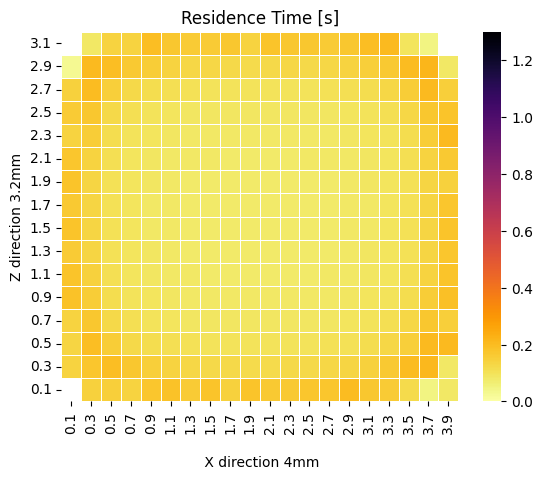

In [219]:

z_idx = np.round(np.arange(0.1,3.2,0.2),2)
x_idx = np.round(np.arange(0.1,4,0.2),1)
dfTimes.set_index(z_idx[::-1], inplace=True)
dfTimes = dfTimes.T.set_index(x_idx).T

sns.heatmap(dfTimes, cmap='inferno_r', linewidths=.5, fmt='g', vmin=0, vmax=1.3)
plt.xlabel('\n X direction 4mm')
plt.ylabel('Z direction 3.2mm')
plt.yticks(rotation='horizontal')
plt.title('Residence Time [s]')

In [220]:
dfProb = pd.concat([df_floor, timeResults[['t']]*0+1], axis=1)
dfProb = dfProb.groupby(['x', 'z']).sum()
dfProb = dfProb.reset_index()
dfProb = dfProb.pivot(index='z', columns='x', values='t')
dfProb = dfProb / 10_000*100
dfProb

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
z,,,,,,,,,,,,,,,,,,,,
0,NaN,0.03,0.05,0.04,0.08,0.06,0.09,0.08,0.13,0.06,0.10,0.13,0.09,0.10,0.08,0.06,0.05,0.05,0.02,NaN
1,0.02,0.16,0.18,0.25,0.30,0.27,0.30,0.33,0.36,0.32,0.33,0.32,0.30,0.34,0.26,0.26,0.28,0.16,0.11,0.05
2,0.05,0.24,0.31,0.29,0.37,0.36,0.43,0.39,0.33,0.41,0.39,0.39,0.36,0.38,0.39,0.41,0.30,0.29,0.20,0.05
3,0.02,0.23,0.28,0.39,0.39,0.43,0.43,0.44,0.46,0.45,0.43,0.43,0.45,0.40,0.37,0.39,0.37,0.34,0.26,0.06
4,0.04,0.28,0.37,0.40,0.39,0.38,0.42,0.45,0.45,0.42,0.44,0.44,0.44,0.44,0.44,0.35,0.43,0.37,0.27,0.07
5,0.09,0.27,0.40,0.41,0.43,0.46,0.43,0.44,0.47,0.47,0.47,0.45,0.41,0.47,0.46,0.38,0.42,0.34,0.30,0.06
6,0.08,0.31,0.39,0.38,0.43,0.44,0.46,0.50,0.40,0.50,0.44,0.50,0.50,0.42,0.44,0.49,0.39,0.41,0.29,0.04
7,0.07,0.31,0.35,0.46,0.41,0.48,0.44,0.40,0.48,0.44,0.49,0.47,0.44,0.42,0.44,0.43,0.38,0.39,0.33,0.09
8,0.07,0.29,0.43,0.39,0.43,0.44,0.46,0.50,0.43,0.48,0.47,0.44,0.47,0.44,0.45,0.47,0.37,0.41,0.31,0.08


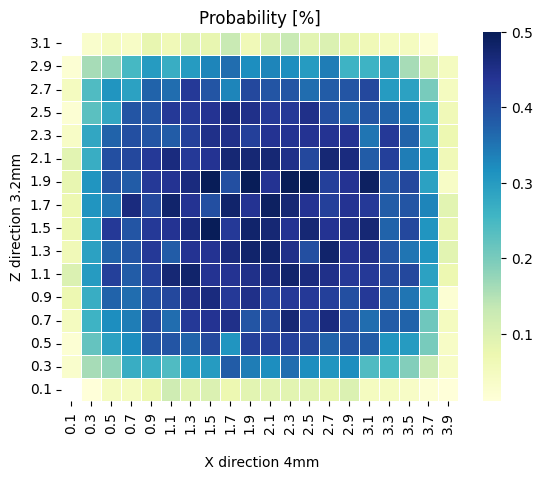

In [221]:

z_idx = np.round(np.arange(0.1,3.2,0.2),2)
x_idx = np.round(np.arange(0.1,4,0.2),1)
dfProb.set_index(z_idx[::-1], inplace=True)
dfProb = dfProb.T.set_index(x_idx).T

sns.heatmap(dfProb, cmap='YlGnBu', linewidths=.5, fmt='g')
plt.xlabel('\n X direction 4mm')
plt.ylabel('Z direction 3.2mm')
plt.yticks(rotation='horizontal')
plt.title('Probability [%]')
plt.show()